# LAB
Rajesh Siraskar | 02-May-2021

1. FFT:
$s(t) = A_1.sin(2\pi.f_1.t + \phi_1) + A_2.sin(2\pi.f_2.t + \phi_2) + \dots$
2. [PyToch Autograd function](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html)

9. [Plotting](https://stackoverflow.com/questions/22566692/python-how-to-plot-graph-sine-wave) a sine wave, given a freq. 

In [5]:
import warnings
warnings.filterwarnings("ignore")

In [60]:
import math
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

$s(t) = A_1.sin(2\pi.f_1.t + \phi_1) + A_2.sin(2\pi.f_2.t + \phi_2)$

In [51]:
A1 = 0.5
f1 = 8.0
p1 = 0.0

A2 = 1.5
f2 = 1.5
p2 = 0.0

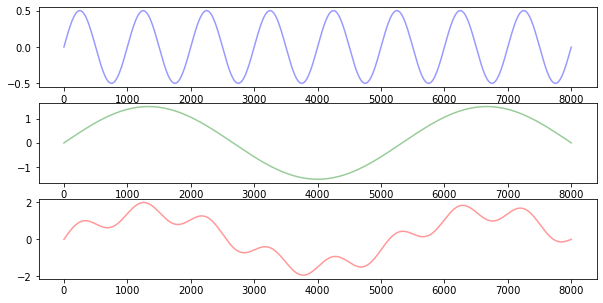

In [55]:
Fs = 8000
sample = 8000

t = np.arange(sample)

s1 = A1*np.sin(2*np.pi*f1*(t/Fs) + p1)
s2 = A2*np.sin(2*np.pi*f2*(t/Fs) + p2)
s  = s1+s2

plt.figure(figsize=(10, 5))

plt.subplot(3, 1, 1) 
plt.plot(t, s1, color='b', alpha=0.4)
plt.subplot(3, 1, 2) 
plt.plot(t, s2, color='g', alpha=0.4)
plt.subplot(3, 1, 3) 
plt.plot(t, s, color='r', alpha=0.4)

plt.show()

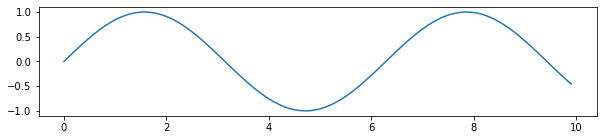

In [59]:
time = np.arange(0, 10, 0.1);

# Amplitude of the sine wave is sine of a variable like time
amplitude = np.sin(time)

# Plot a sine wave using time and amplitude obtained for the sine wave
plt.figure(figsize=(10, 2))
plt.plot(time, amplitude)

### Autograd: [link](https://pytorch.org/tutorials/beginner/blitz/autograd_tutorial.html#differentiation-in-autograd)
- Tensor $Q = f(a, b)$, where $a$ and $b$ are tensors
- $Q = 3a^3 - b^2$
- Assume $a$ and $b$ are parameters of a NN, and $Q$ is the error
- During NN training, we want **gradients** of the **error** _w.r.t._ **parameters**
- $\frac{\partial Q}{\partial a} = 9a^2$
- $\frac{\partial Q}{\partial b} = -2b$

In [31]:
import torch

a = torch.tensor([2.0, 3.0], requires_grad=True)
b = torch.tensor([6.0, 4.0], requires_grad=True)

In [32]:
Q = 3*a**3 - b**2

- When we call `.backward()` on `Q`, autograd calculates these gradients (for $a$ and $b$ and stores them in the respective tensors’ `.grad` attribute i.e. `a.grad` and `b.grad`.
- **Important**: We need to **explicitly** pass a gradient argument in `Q.backward()` because it is a vector
- `gradient` is a tensor of the same shape as `Q`, and it represents the gradient of Q w.r.t. itself, i.e. $\frac{dQ}{dQ} = 1$

- Equivalently, we can also aggregate `Q` into a scalar and call backward implicitly, like `Q.sum().backward()`

In [33]:
# Define a 'dummy' gradient argument
external_grad = torch.tensor([1., 1.])

# Call .backward and pass this argument to actually compute the error gradients
Q.backward(gradient=external_grad)

In [34]:
# Check if collected gradients are correct
print("PyTorch autograd gives a.grad = ", a.grad)
 
computed_gradient_wrt_a = [9*(2.**2), 9*(3.**2)] 
print("Computed gradient w.r.t 'a', at a = [2., 3.] = 9a^2 = {}".format(computed_gradient_wrt_a))

PyTorch autograd gives a.grad =  tensor([36., 81.])
Computed gradient w.r.t 'a', at a = [2., 3.] = 9a^2 = [36.0, 81.0]


In [35]:
# Check if collected gradients are correct
print("PyTorch autograd gives b.grad = ", b.grad)
 
computed_gradient_wrt_b = [-2*(6.0), -2*(4.0)] 
print("Computed gradient w.r.t 'b', at b = [6., 4.] = -2b = {}".format(computed_gradient_wrt_b))

PyTorch autograd gives b.grad =  tensor([-12.,  -8.])
Computed gradient w.r.t 'b', at b = [6., 4.] = -2b = [-12.0, -8.0]


### Vectors/Matrices
- Convolution
- In output, the middle square is where the dot product is replaced
$\sum_{i=1}^{P} I_i.K_i = 5.1 + 2.0 + \dots + 0.-1 = 18$

In [1]:
5*1 + 2*0 + 3*0 + 2*2 + 4*1 + 1*0 + 5*1 + 1*0 + 0*-1

18